In [ ]:
# Install only missing libs
!pip install mlxtend --quiet
!pip install folium --quiet

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth


import folium
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML Project/US_Accidents_March23.csv',nrows=80000)

In [ ]:
df_tmp = pd.read_csv('/content/drive/MyDrive/ML Project/US_Accidents_March23.csv', nrows=5)
df_tmp.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
severity_counts = df['Severity'].value_counts().sort_index()
severity_percent = df['Severity'].value_counts(normalize=True).sort_index()*100

severity_df = pd.DataFrame({
    "Count": severity_counts,
    "Percentage (%)": severity_percent.round(2)
})

severity_df

Count  Percentage (%)
Severity                         
1           57141            1.05
2         4330008           79.37
3          949072           17.40
4          119011            2.18

In [ ]:
use_cols = ["ID","Severity","Start_Time","End_Time","City","County","State","Timezone","Temperature(F)","Humidity(%)","Visibility(mi)","Weather_Condition","Wind_Direction",
"Wind_Speed(mph)","Precipitation(in)","Distance(mi)","Traffic_Signal","Crossing","Junction","Stop"]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/US_Accidents_March23.csv',
                 usecols=use_cols)

In [ ]:
df.head(10)

ID  Severity           Start_Time             End_Time  Distance(mi)  \
0   A-1         3  2016-02-08 05:46:00  2016-02-08 11:00:00          0.01   
1   A-2         2  2016-02-08 06:07:59  2016-02-08 06:37:59          0.01   
2   A-3         2  2016-02-08 06:49:27  2016-02-08 07:19:27          0.01   
3   A-4         3  2016-02-08 07:23:34  2016-02-08 07:53:34          0.01   
4   A-5         2  2016-02-08 07:39:07  2016-02-08 08:09:07          0.01   
5   A-6         3  2016-02-08 07:44:26  2016-02-08 08:14:26          0.01   
6   A-7         2  2016-02-08 07:59:35  2016-02-08 08:29:35          0.00   
7   A-8         3  2016-02-08 07:59:58  2016-02-08 08:29:58          0.01   
8   A-9         2  2016-02-08 08:00:40  2016-02-08 08:30:40          0.00   
9  A-10         3  2016-02-08 08:10:04  2016-02-08 08:40:04          0.01   

           City      County State    Timezone  Temperature(F)  Humidity(%)  \
0        Dayton  Montgomery    OH  US/Eastern            36.9         91.0   
1  Reynoldsburg    Franklin    OH  US/Eastern            37.9        100.0   
2  Williamsburg    Clermont    OH  US/Eastern            36.0        100.0   
3        Dayton  Montgomery    OH  US/Eastern            35.1         96.0   
4        Dayton  Montgomery    OH  US/Eastern            36.0         89.0   
5   Westerville    Franklin    OH  US/Eastern            37.9         97.0   
6        Dayton  Montgomery    OH  US/Eastern            34.0        100.0   
7        Dayton  Montgomery    OH  US/Eastern            34.0        100.0   
8        Dayton  Montgomery    OH  US/Eastern            33.3         99.0   
9   Westerville    Franklin    OH  US/Eastern            37.4        100.0   

   Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in)  \
0            10.0           Calm              NaN               0.02   
1            10.0           Calm              NaN               0.00   
2            10.0             SW              3.5                NaN   
3             9.0             SW              4.6                NaN   
4             6.0             SW              3.5                NaN   
5             7.0            SSW              3.5               0.03   
6             7.0            WSW              3.5                NaN   
7             7.0            WSW              3.5                NaN   
8             5.0             SW              1.2                NaN   
9             3.0            SSW              4.6               0.02   

  Weather_Condition  Crossing  Junction   Stop  Traffic_Signal  
0        Light Rain     False     False  False           False  
1        Light Rain     False     False  False           False  
2          Overcast     False     False  False            True  
3     Mostly Cloudy     False     False  False           False  
4     Mostly Cloudy     False     False  False            True  
5        Light Rain     False     False  False           False  
6          Overcast     False     False  False           False  
7          Overcast     False     False  False           False  
8     Mostly Cloudy     False     False  False           False  
9        Light Rain     False     False  False           False

In [ ]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (7728394, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Distance(mi)       float64
 5   City               object 
 6   County             object 
 7   State              object 
 8   Timezone           object 
 9   Temperature(F)     float64
 10  Humidity(%)        float64
 11  Visibility(mi)     float64
 12  Wind_Direction     object 
 13  Wind_Speed(mph)    float64
 14  Precipitation(in)  float64
 15  Weather_Condition  object 
 16  Crossing           bool   
 17  Junction           bool   
 18  Stop               bool   
 19  Traffic_Signal     bool   
dtypes: bool(4), float64(6), int64(1), object(9)
memory usage: 972.9+ MB


In [ ]:
df.describe(include='all')

ID      Severity           Start_Time             End_Time  \
count     7728394  7.728394e+06              7728394              7728394   
unique    7728394           NaN              6131796              6705355   
top     A-7777761           NaN  2021-01-26 16:16:13  2021-11-22 08:00:00   
freq            1           NaN                  225                  112   
mean          NaN  2.212384e+00                  NaN                  NaN   
std           NaN  4.875313e-01                  NaN                  NaN   
min           NaN  1.000000e+00                  NaN                  NaN   
25%           NaN  2.000000e+00                  NaN                  NaN   
50%           NaN  2.000000e+00                  NaN                  NaN   
75%           NaN  2.000000e+00                  NaN                  NaN   
max           NaN  4.000000e+00                  NaN                  NaN   

        Distance(mi)     City       County    State    Timezone  \
count   7.728394e+06  7728141      7728394  7728394     7720586   
unique           NaN    13678         1871       49           4   
top              NaN    Miami  Los Angeles       CA  US/Eastern   
freq             NaN   186917       526851  1741433     3580167   
mean    5.618423e-01      NaN          NaN      NaN         NaN   
std     1.776811e+00      NaN          NaN      NaN         NaN   
min     0.000000e+00      NaN          NaN      NaN         NaN   
25%     0.000000e+00      NaN          NaN      NaN         NaN   
50%     3.000000e-02      NaN          NaN      NaN         NaN   
75%     4.640000e-01      NaN          NaN      NaN         NaN   
max     4.417500e+02      NaN          NaN      NaN         NaN   

        Temperature(F)   Humidity(%)  Visibility(mi) Wind_Direction  \
count     7.564541e+06  7.554250e+06    7.551296e+06        7553188   
unique             NaN           NaN             NaN             24   
top                NaN           NaN             NaN           CALM   
freq               NaN           NaN             NaN         961624   
mean      6.166329e+01  6.483104e+01    9.090376e+00            NaN   
std       1.901365e+01  2.282097e+01    2.688316e+00            NaN   
min      -8.900000e+01  1.000000e+00    0.000000e+00            NaN   
25%       4.900000e+01  4.800000e+01    1.000000e+01            NaN   
50%       6.400000e+01  6.700000e+01    1.000000e+01            NaN   
75%       7.600000e+01  8.400000e+01    1.000000e+01            NaN   
max       2.070000e+02  1.000000e+02    1.400000e+02            NaN   

        Wind_Speed(mph)  Precipitation(in) Weather_Condition Crossing  \
count      7.157161e+06       5.524808e+06           7554935  7728394   
unique              NaN                NaN               144        2   
top                 NaN                NaN              Fair    False   
freq                NaN                NaN           2560802  6854631   
mean       7.685490e+00       8.407210e-03               NaN      NaN   
std        5.424983e+00       1.102246e-01               NaN      NaN   
min        0.000000e+00       0.000000e+00               NaN      NaN   
25%        4.600000e+00       0.000000e+00               NaN      NaN   
50%        7.000000e+00       0.000000e+00               NaN      NaN   
75%        1.040000e+01       0.000000e+00               NaN      NaN   
max        1.087000e+03       3.647000e+01               NaN      NaN   

       Junction     Stop Traffic_Signal  
count   7728394  7728394        7728394  
unique        2        2              2  
top       False    False          False  
freq    7157052  7514023        6584622  
mean        NaN      NaN            NaN  
std         NaN      NaN            NaN  
min         NaN      NaN            NaN  
25%         NaN      NaN            NaN  
50%         NaN      NaN            NaN  
75%         NaN      NaN            NaN  
max         NaN      NaN            NaN

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print("\n Missing Values Count:")
print(df.isnull().sum())


 Missing Values Count:
ID                         0
Severity                   0
Start_Time                 0
End_Time                   0
Distance(mi)               0
City                     253
County                     0
State                      0
Timezone                7808
Temperature(F)        163853
Humidity(%)           174144
Visibility(mi)        177098
Wind_Direction        175206
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
Crossing                   0
Junction                   0
Stop                       0
Traffic_Signal             0
dtype: int64


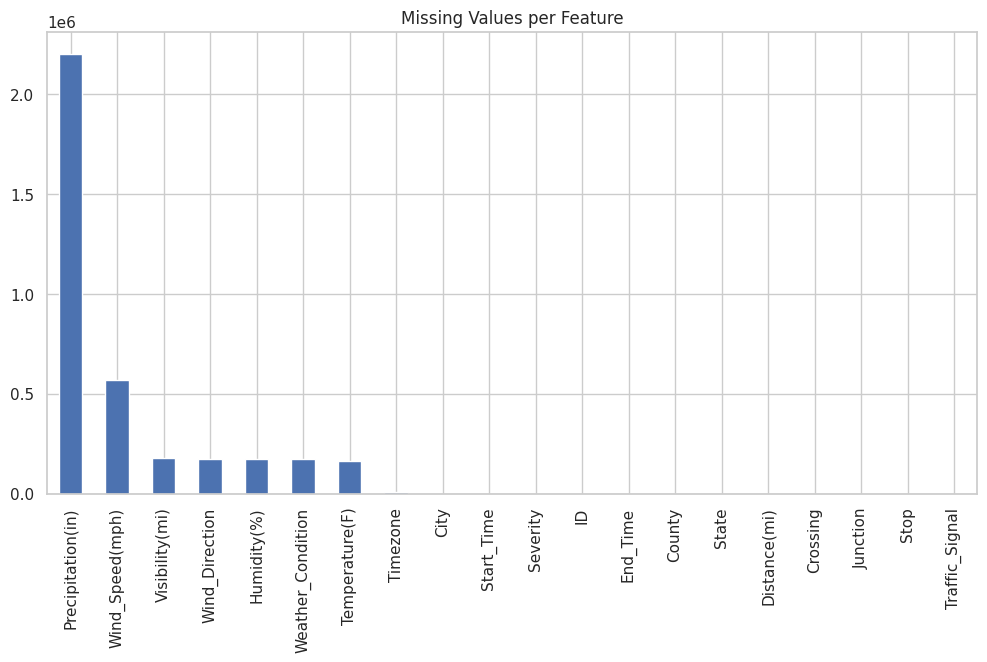

In [ ]:
# Bar plot for missing values
plt.figure(figsize=(12,6))
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Missing Values per Feature")
plt.show()

In [ ]:
print("\n Converting Start_Time...")

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour']    = df['Start_Time'].dt.hour
df['Month']   = df['Start_Time'].dt.month
df['Weekday'] = df['Start_Time'].dt.day_name()

print(" Date Features Extracted!")


 Converting Start_Time...
 Date Features Extracted!


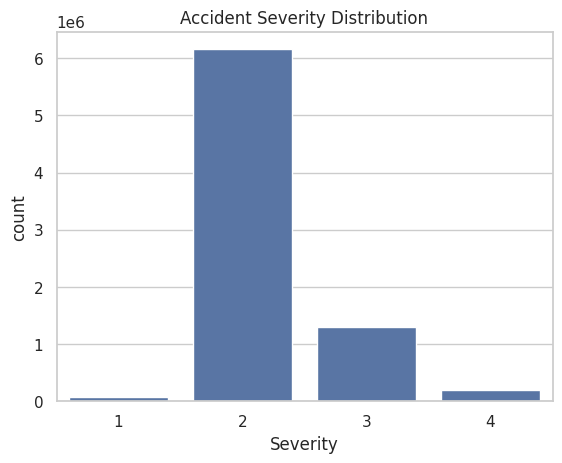

In [ ]:
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

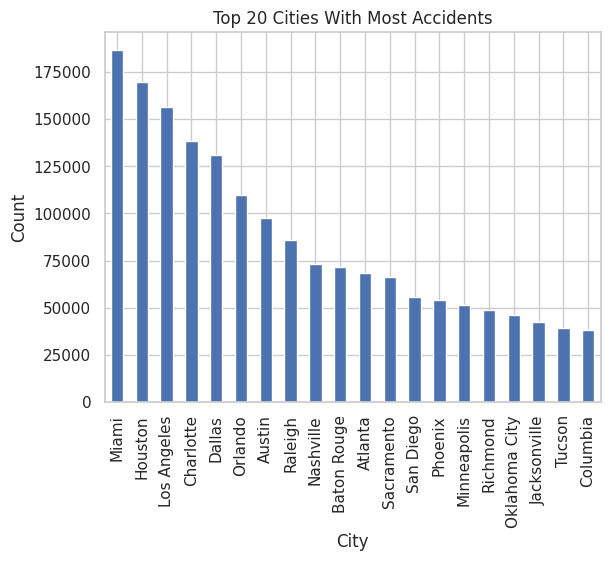

In [ ]:
df['City'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Cities With Most Accidents")
plt.ylabel("Count")
plt.show()

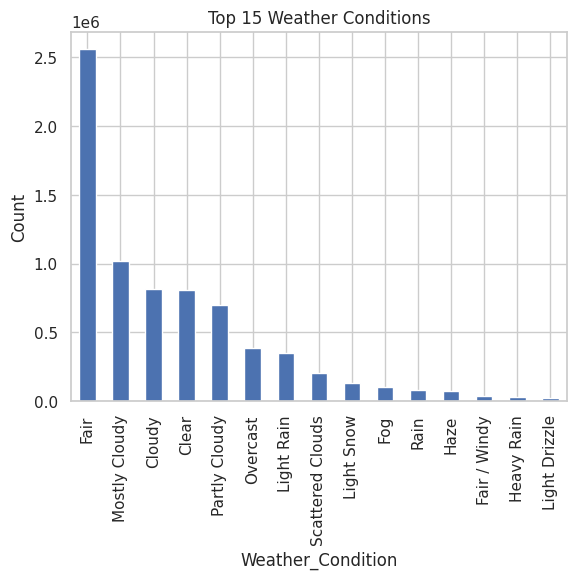

In [ ]:
df['Weather_Condition'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Weather Conditions")
plt.ylabel("Count")
plt.show()


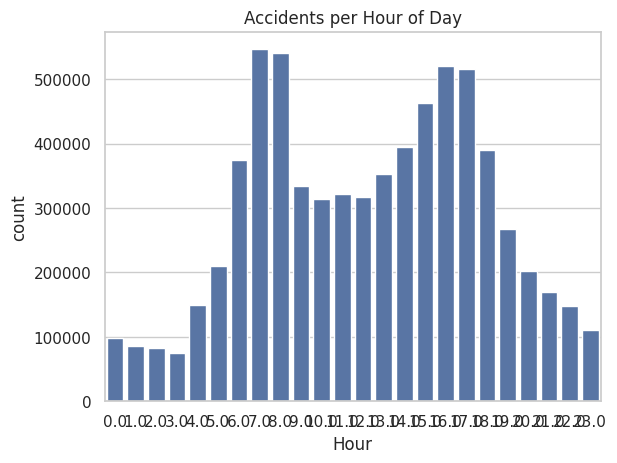

In [ ]:
sns.countplot(x='Hour', data=df)
plt.title("Accidents per Hour of Day")
plt.show()

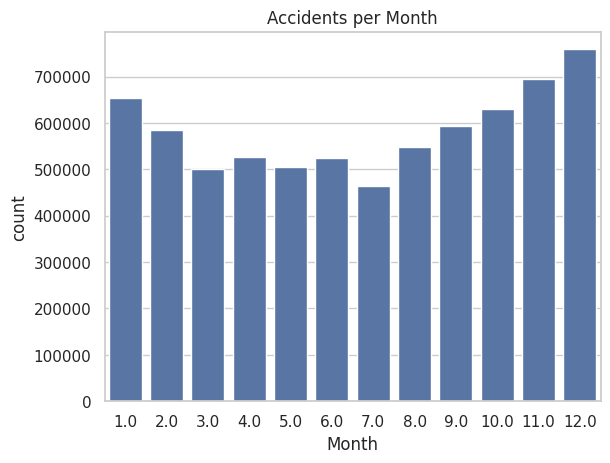

In [ ]:
sns.countplot(x='Month', data=df)
plt.title("Accidents per Month")
plt.show()

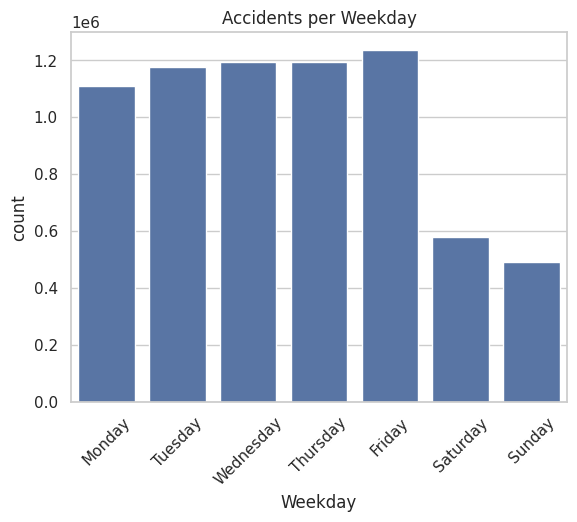

In [ ]:
sns.countplot(
    x='Weekday',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title("Accidents per Weekday")
plt.xticks(rotation=45)
plt.show()

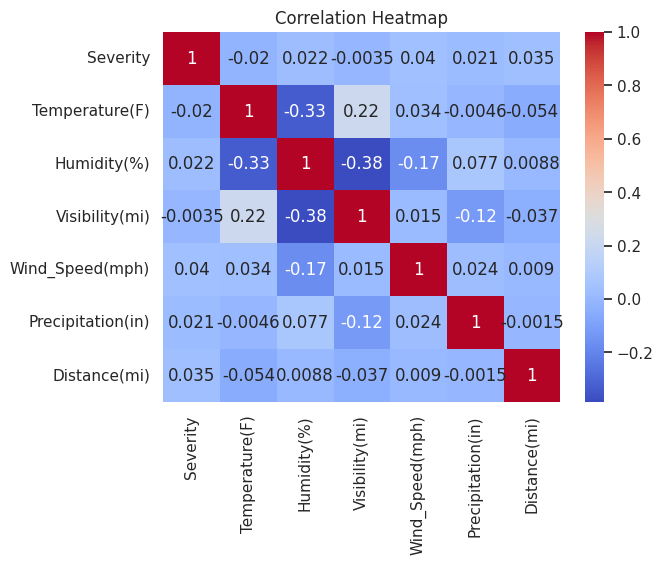

In [ ]:
num_cols = [
    "Severity","Temperature(F)","Humidity(%)",
    "Visibility(mi)","Wind_Speed(mph)",
    "Precipitation(in)","Distance(mi)"
]

corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

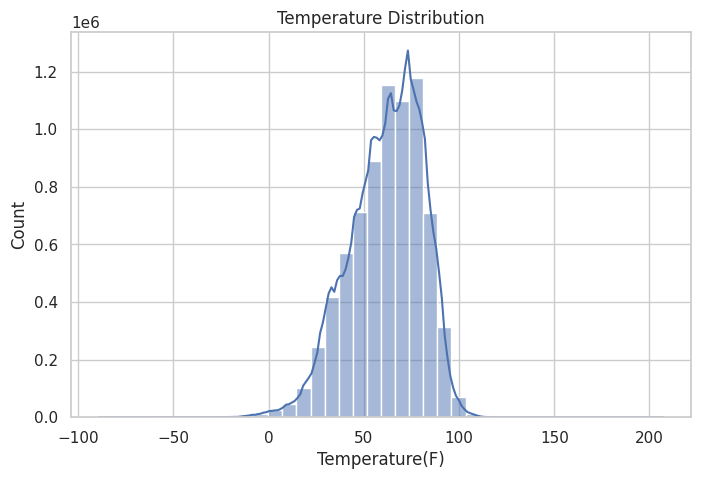

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Temperature(F)'], bins=40, kde=True)
plt.title("Temperature Distribution")
plt.show()

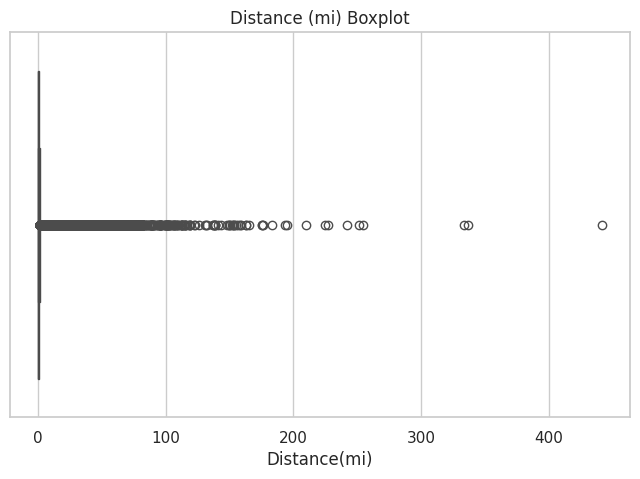

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Distance(mi)'])
plt.title("Distance (mi) Boxplot")
plt.show()

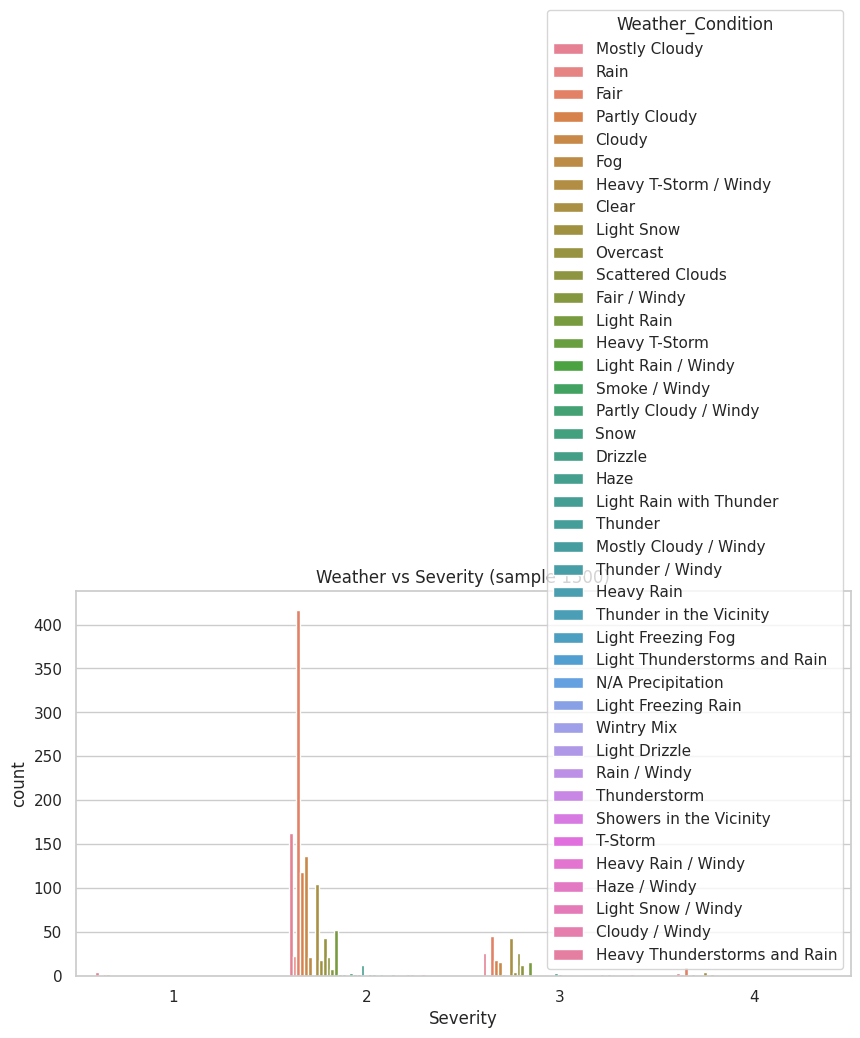

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Severity', hue='Weather_Condition', data=df.sample(1500))
plt.title("Weather vs Severity (sample 1500)")
plt.xticks(rotation=0)
plt.show()

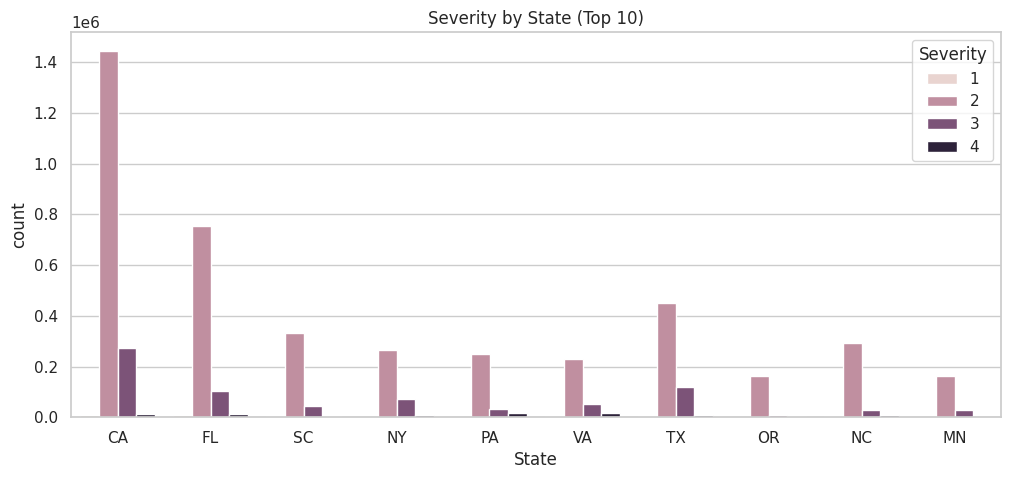

In [ ]:
top_states = df['State'].value_counts().head(10).index
state_df = df[df['State'].isin(top_states)]

plt.figure(figsize=(12,5))
sns.countplot(x='State', hue='Severity', data=state_df)
plt.title("Severity by State (Top 10)")
plt.show()

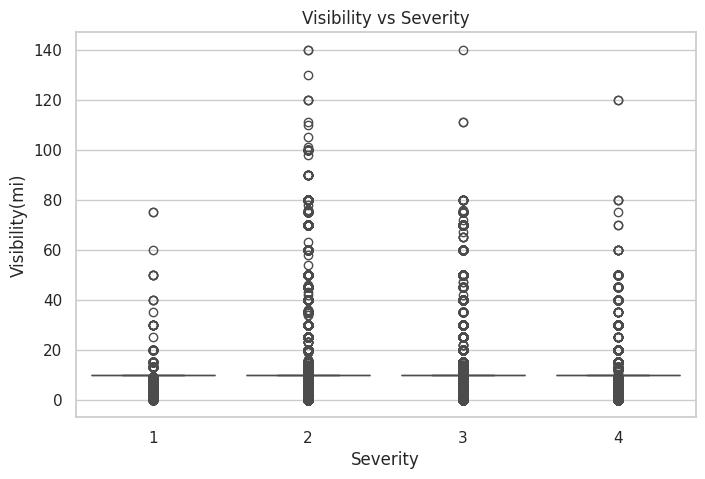

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title("Visibility vs Severity")
plt.show()

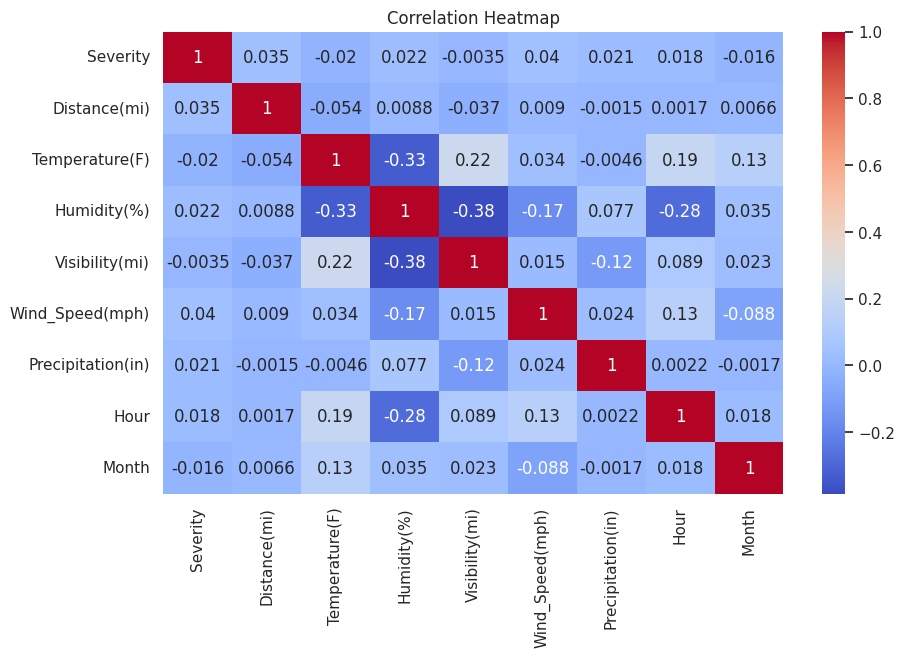

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

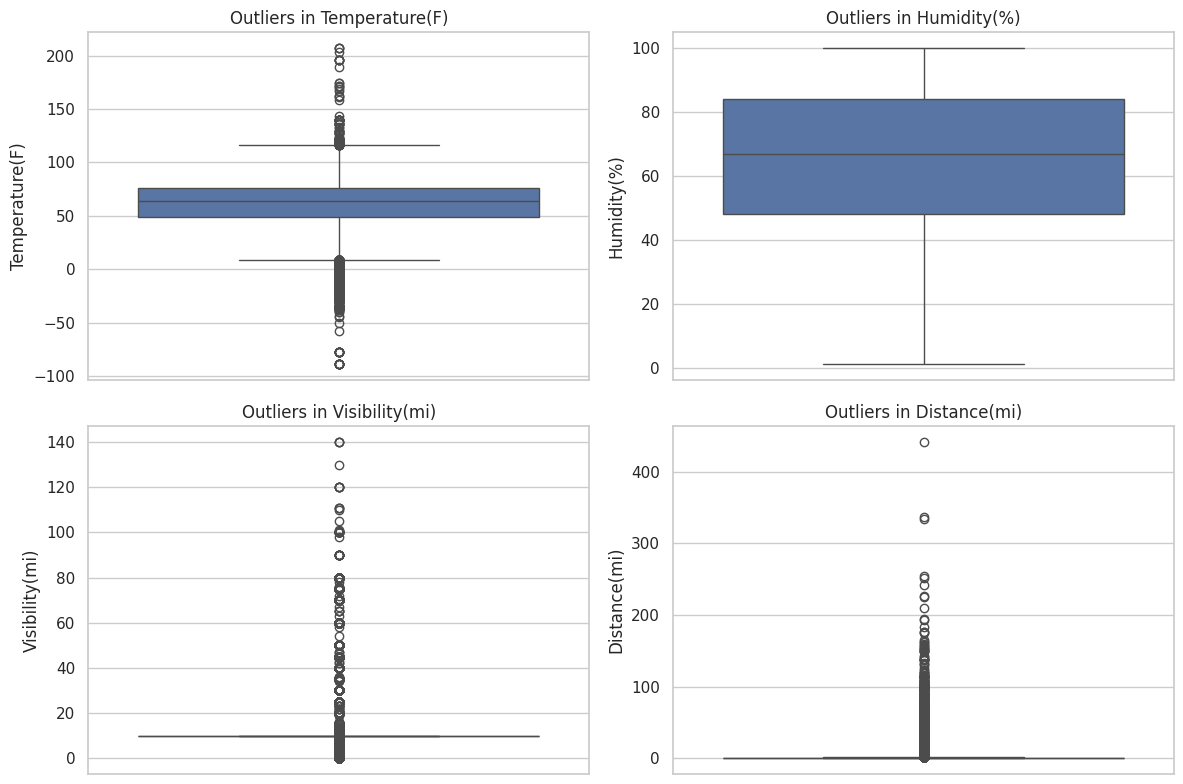

In [ ]:
numeric_columns = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Distance(mi)']


plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(f"Outliers in {col}")

plt.tight_layout()
plt.show()

In [ ]:
#Numeric columns (median)
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
#Categorical columns (mode)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Datetime-derived columns → safe fill
if 'Start_Time' in df.columns:
    df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
    df['Start_Time'].fillna(df['Start_Time'].mode()[0], inplace=True)

if 'End_Time' in df.columns:
    df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
    df['End_Time'].fillna(df['End_Time'].mode()[0], inplace=True)


In [ ]:
# 4. Boolean-like columns → fill 0
for c in df.columns:
    if df[c].dtype == 'bool':
        df[c].fillna(False, inplace=True)
    if df[c].astype(str).isin(['TRUE','FALSE','True','False']).any():
        df[c] = df[c].replace({'TRUE':1,'FALSE':0,'True':1,'False':0})
        df[c].fillna(0, inplace=True)


In [ ]:
#Handle Outliers (IQR Method)
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

outlier_cols = ['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)']
for col in outlier_cols:
    if col in df.columns:
        df = remove_outliers_iqr(df, col)

In [ ]:
#Label Encoding (small categories)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encode_cols = ['State', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight']
for col in encode_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
#Scaling Numeric Columns
from sklearn.preprocessing import StandardScaler

scale_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()

# Remove Target
if 'Severity' in scale_cols:
    scale_cols.remove('Severity')

scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [ ]:
df.to_csv("cleaned_us_accident.csv", index=False)
print("Preprocessed dataset saved to Drive!")

Preprocessed dataset saved to Drive!


In [ ]:
df.head(10)

ID  Severity          Start_Time            End_Time  Distance(mi)  \
0    A-1         3 2016-02-08 05:46:00 2016-02-08 11:00:00     -0.555686   
1    A-2         2 2016-02-08 06:07:59 2016-02-08 06:37:59     -0.555686   
2    A-3         2 2016-02-08 06:49:27 2016-02-08 07:19:27     -0.555686   
13  A-14         2 2016-02-08 08:37:07 2016-02-08 09:07:07     -0.555686   
17  A-18         2 2016-02-08 09:24:37 2016-02-08 09:54:37     -0.592343   
18  A-19         2 2016-02-08 09:25:17 2016-02-08 09:55:17     -0.555686   
19  A-20         2 2016-02-08 09:35:35 2016-02-08 10:05:35     -0.555686   
21  A-22         2 2016-02-08 10:24:27 2016-02-08 10:54:27     -0.592343   
24  A-25         2 2016-02-08 12:16:44 2016-02-08 13:01:44     -0.555686   
27  A-28         2 2016-02-08 14:24:48 2016-02-08 15:09:48     -0.592343   

            City      County     State    Timezone  Temperature(F)  ...  \
0         Dayton  Montgomery  0.850227  US/Eastern       -1.562098  ...   
1   Reynoldsburg    Franklin  0.850227  US/Eastern       -1.505015  ...   
2   Williamsburg    Clermont  0.850227  US/Eastern       -1.613473  ...   
13        Dayton  Montgomery  0.850227  US/Eastern       -1.613473  ...   
17        Dayton  Montgomery  0.850227  US/Eastern       -1.613473  ...   
18        Dayton  Montgomery  0.850227  US/Eastern       -1.533557  ...   
19        Dayton  Montgomery  0.850227  US/Eastern       -1.613473  ...   
21        Dayton  Montgomery  0.850227  US/Eastern       -1.613473  ...   
24        Dayton  Montgomery  0.850227  US/Eastern       -1.505015  ...   
27        Dayton  Montgomery  0.850227  US/Eastern       -1.390849  ...   

    Wind_Speed(mph)  Precipitation(in) Weather_Condition  Crossing  Junction  \
0         -0.143378           0.203927          0.303820     False     False   
1         -0.143378          -0.021255          0.303820     False     False   
2         -0.831573          -0.021255          1.267157     False     False   
13        -0.379331          -0.021255          1.141505     False     False   
17        -0.379331          -0.021255          1.141505     False     False   
18        -0.163041          -0.021255          1.267157      True     False   
19        -0.163041          -0.021255          1.141505     False     False   
21        -0.163041          -0.021255          1.141505     False     False   
24         0.525154          -0.021255          1.267157     False     False   
27         0.741444          -0.021255          1.141505     False     False   

     Stop  Traffic_Signal      Hour     Month  Weekday  
0   False           False -1.486440 -1.428129   Monday  
1   False           False -1.291705 -1.428129   Monday  
2   False            True -1.291705 -1.428129   Monday  
13  False            True -0.902235 -1.428129   Monday  
17  False           False -0.707500 -1.428129   Monday  
18  False            True -0.707500 -1.428129   Monday  
19  False           False -0.707500 -1.428129   Monday  
21  False           False -0.512765 -1.428129   Monday  
24  False            True -0.123295 -1.428129   Monday  
27  False            True  0.266175 -1.428129   Monday  

[10 rows x 23 columns]

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Copy for ARM
arm_df = df.copy()

In [ ]:
# Binning numeric features
arm_df['Temp_Bin'] = pd.cut(arm_df['Temperature(F)'],
                            bins=[-5, 0, 1, 2, 5],
                            labels=['Very Cold','Cold','Mild','Hot'])

In [ ]:
arm_df['Visibility_Bin'] = pd.cut(arm_df['Visibility(mi)'],
                                  bins=[-5, -1, 0, 1, 5],
                                  labels=['Very Low','Low','Medium','High'])

In [ ]:
arm_df['Distance_Bin'] = pd.cut(arm_df['Distance(mi)'],
                                bins=[-5, -1, 0, 1, 5],
                                labels=['Very Short','Short','Medium','Long'])

In [ ]:
# Select ARM features
arm_features = [
    'Severity',
    'Weather_Condition',
    'Temp_Bin',
    'Visibility_Bin',
    'Traffic_Signal',
    'Junction',
    'Crossing'
]

arm_df = arm_df[arm_features].astype(str)
arm_df.head()

Severity    Weather_Condition   Temp_Bin Visibility_Bin Traffic_Signal  \
0         3  0.30382044524544033  Very Cold            Low          False   
1         2  0.30382044524544033  Very Cold            Low          False   
2         2   1.2671574755036181  Very Cold            Low           True   
13        2   1.1415048193829864  Very Cold            Low           True   
17        2   1.1415048193829864  Very Cold            Low          False   

   Junction Crossing  
0     False    False  
1     False    False  
2     False    False  
13    False    False  
17    False    False

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

transactions = arm_df.values.tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

arm_encoded = pd.DataFrame(te_array, columns=te.columns_)
arm_encoded.head()

-0.03125330440957804  -0.07313752311645534  -0.11502174182333263  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   -0.15690596053020994  -0.19879017923708725  -0.24067439794396453  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   -0.2825586166508418  -0.3244428353577191  -0.3663270540645964  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   -0.40821127277147373  ...  3.026294661192465  3.068178879899342      4  \
0                 False  ...              False              False  False   
1                 False  ...              False              False  False   
2                 False  ...              False              False  False   
3                 False  ...              False              False  False   
4                 False  ...              False              False  False   

    Cold  False    Hot   Low   Mild   True  Very Cold  
0  False   True  False  True  False  False       True  
1  False   True  False  True  False  False       True  
2  False   True  False  True  False   True       True  
3  False   True  False  True  False   True       True  
4  False   True  False  True  False  False       True  

[5 rows x 112 columns]

In [ ]:
# Reduce size for Apriori
arm_sample = arm_encoded.sample(n=50000, random_state=42)

frequent_apriori = apriori(
    arm_sample,
    min_support=0.03,
    use_colnames=True
)

rules_apriori = association_rules(
    frequent_apriori,
    metric="confidence",
    min_threshold=0.6
)

rules_apriori.sort_values(by='lift', ascending=False).head(10)


antecedents              consequents  \
136              (1.2671574755036181)         (Low, Very Cold)   
135         (1.2671574755036181, Low)              (Very Cold)   
16               (1.2671574755036181)              (Very Cold)   
378       (1.2671574755036181, False)         (Low, Very Cold)   
375  (1.2671574755036181, Low, False)              (Very Cold)   
132       (1.2671574755036181, False)              (Very Cold)   
379              (1.2671574755036181)  (Low, Very Cold, False)   
377         (1.2671574755036181, Low)       (Very Cold, False)   
133              (1.2671574755036181)       (Very Cold, False)   
517      (-0.868937678547124, Low, 2)       (Very Cold, False)   

     antecedent support  consequent support  support  confidence      lift  \
136             0.04736             0.47986  0.03344    0.706081  1.471431   
135             0.04736             0.47986  0.03344    0.706081  1.471431   
16              0.04736             0.47986  0.03344    0.706081  1.471431   
378             0.04728             0.47986  0.03336    0.705584  1.470395   
375             0.04728             0.47986  0.03336    0.705584  1.470395   
132             0.04728             0.47986  0.03336    0.705584  1.470395   
379             0.04736             0.47954  0.03336    0.704392  1.468891   
377             0.04736             0.47954  0.03336    0.704392  1.468891   
133             0.04736             0.47954  0.03336    0.704392  1.468891   
517             0.08284             0.47954  0.05538    0.668518  1.394081   

     representativity  leverage  conviction  zhangs_metric   jaccard  \
136               1.0  0.010714    1.769672       0.336318  0.067722   
135               1.0  0.010714    1.769672       0.336318  0.067722   
16                1.0  0.010714    1.769672       0.336318  0.067722   
378               1.0  0.010672    1.766682       0.335787  0.067560   
375               1.0  0.010672    1.766682       0.335787  0.067560   
132               1.0  0.010672    1.766682       0.335787  0.067560   
379               1.0  0.010649    1.760642       0.335084  0.067593   
377               1.0  0.010649    1.760642       0.335084  0.067593   
133               1.0  0.010649    1.760642       0.335084  0.067593   
517               1.0  0.015655    1.570099       0.308214  0.109231   

     certainty  kulczynski  
136   0.434923    0.387884  
135   0.434923    0.387884  
16    0.434923    0.387884  
378   0.433967    0.387552  
375   0.433967    0.387552  
132   0.433967    0.387552  
379   0.432025    0.386979  
377   0.432025    0.386979  
133   0.432025    0.386979  
517   0.363097    0.392002

In [ ]:
# Medium sample for FP-Growth
fp_sample = arm_encoded.sample(n=200000, random_state=42)

frequent_fp = fpgrowth(
    fp_sample,
    min_support=0.02,
    use_colnames=True
)

rules_fp = association_rules(
    frequent_fp,
    metric="confidence",
    min_threshold=0.6
)

rules_fp.sort_values(by='lift', ascending=False).head(10)


antecedents              consequents  \
612         (1.2671574755036181, Low)              (Very Cold)   
613              (1.2671574755036181)         (Low, Very Cold)   
571              (1.2671574755036181)              (Very Cold)   
622       (1.2671574755036181, False)         (Low, Very Cold)   
615       (1.2671574755036181, False)              (Very Cold)   
619  (1.2671574755036181, Low, False)              (Very Cold)   
616              (1.2671574755036181)       (Very Cold, False)   
623              (1.2671574755036181)  (Low, Very Cold, False)   
621         (1.2671574755036181, Low)       (Very Cold, False)   
592      (1.2671574755036181, Low, 2)              (Very Cold)   

     antecedent support  consequent support   support  confidence      lift  \
612            0.046325            0.478410  0.032285    0.696924  1.456750   
613            0.046325            0.478410  0.032285    0.696924  1.456750   
571            0.046325            0.478410  0.032285    0.696924  1.456750   
622            0.046260            0.478410  0.032235    0.696822  1.456538   
615            0.046260            0.478410  0.032235    0.696822  1.456538   
619            0.046260            0.478410  0.032235    0.696822  1.456538   
616            0.046325            0.478085  0.032235    0.695845  1.455483   
623            0.046325            0.478085  0.032235    0.695845  1.455483   
621            0.046325            0.478085  0.032235    0.695845  1.455483   
592            0.030535            0.478410  0.021140    0.692320  1.447128   

     representativity  leverage  conviction  zhangs_metric   jaccard  \
612               1.0  0.010123    1.720987       0.328771  0.065560   
613               1.0  0.010123    1.720987       0.328771  0.065560   
571               1.0  0.010123    1.720987       0.328771  0.065560   
622               1.0  0.010104    1.720410       0.328644  0.065460   
615               1.0  0.010104    1.720410       0.328644  0.065460   
619               1.0  0.010104    1.720410       0.328644  0.065460   
616               1.0  0.010088    1.715948       0.328144  0.065495   
623               1.0  0.010088    1.715948       0.328144  0.065495   
621               1.0  0.010088    1.715948       0.328144  0.065495   
592               1.0  0.006532    1.695237       0.318708  0.043337   

     certainty  kulczynski  
612   0.418938    0.382204  
613   0.418938    0.382204  
571   0.418938    0.382204  
622   0.418743    0.382101  
615   0.418743    0.382101  
619   0.418743    0.382101  
616   0.417232    0.381635  
623   0.417232    0.381635  
621   0.417232    0.381635  
592   0.410112    0.368254

In [ ]:

print("Apriori Rules:", rules_apriori.shape[0])
print("FP-Growth Rules:", rules_fp.shape[0])


Apriori Rules: 597
FP-Growth Rules: 778


In [ ]:
from sklearn.model_selection import train_test_split

sample_df = df.sample(n=8000, random_state=42)

X = sample_df.drop(columns=['Severity'])
y = sample_df['Severity']

cat_cols = ['City','County','State','Weather_Condition',
            'Traffic_Signal','Junction','Stop']

X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(6400, 2810) (1600, 2810)


In [ ]:
#  Sample
sample_df = df.sample(n=8000, random_state=42)

X = sample_df.drop(columns=['Severity'])
y = sample_df['Severity']


In [ ]:
import pandas as pd

# Your categorical columns
cat_cols = ['City', 'County', 'State', 'Weather_Condition',
            'Traffic_Signal', 'Junction', 'Stop']

# Filter only the columns that actually exist in X
existing_cat_cols = [col for col in cat_cols if col in X.columns]

# Apply one-hot encoding safely
if existing_cat_cols:  # Check if there is at least one column
    X = pd.get_dummies(X, columns=existing_cat_cols, drop_first=True)
else:
    print("No categorical columns found in X for one-hot encoding.")

# Verify
print("Columns after one-hot encoding:", X.columns)


Columns after one-hot encoding: Index(['ID', 'Start_Time', 'End_Time', 'Distance(mi)', 'Timezone',
       'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)',
       ...
       'Weather_Condition_2.523684036709937',
       'Weather_Condition_2.5655682554168147',
       'Weather_Condition_2.6074524741236917',
       'Weather_Condition_2.733105130244324',
       'Weather_Condition_2.774989348951201',
       'Weather_Condition_2.94252622377871',
       'Weather_Condition_3.026294661192465', 'Traffic_Signal_True',
       'Junction_True', 'Stop_True'],
      dtype='object', length=2810)


In [ ]:
# DROP datetime columns
X = X.select_dtypes(include=['int64','float64','uint8','bool'])

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model_bal = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

log_model_bal.fit(X_train, y_train)

# prediction store just  (evaluation will next)
y_pred_log_bal = log_model_bal.predict(X_test)



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_bal = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_model_bal.fit(X_train, y_train)

y_pred_rf_bal = rf_model_bal.predict(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_model_bal = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=1,
        gamma='scale',
        class_weight='balanced'
    ))
])

svm_model_bal.fit(X_train, y_train)

y_pred_svm_bal = svm_model_bal.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model_bal = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)

dt_model_bal.fit(X_train, y_train)

y_pred_dt_bal = dt_model_bal.predict(X_test)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight

# compute weights
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

gb_model_bal = GradientBoostingClassifier(random_state=42)

gb_model_bal.fit(X_train, y_train, sample_weight=sample_weights)

y_pred_gb_bal = gb_model_bal.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Helper function
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }

# Evaluate all models
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_log_bal),
    evaluate_model("Random Forest", y_test, y_pred_rf_bal),
    evaluate_model("SVM (RBF)", y_test, y_pred_svm_bal),
    evaluate_model("Decision Tree", y_test, y_pred_dt_bal),
    evaluate_model("Gradient Boosting", y_test, y_pred_gb_bal)
]

# Create DataFrame
results_df = pd.DataFrame(results)

# Sort by F1-Score descending
results_df = results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

# Show table
results_df


Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.812500   0.780387  0.812500  0.755466
1        Decision Tree  0.706875   0.757824  0.706875  0.727965
2  Logistic Regression  0.625625   0.785490  0.625625  0.678082
3            SVM (RBF)  0.580625   0.745401  0.580625  0.638013
4    Gradient Boosting  0.496875   0.810076  0.496875  0.566266

In [ ]:
best_model = results_df.iloc[0]
print(" Best Model:", best_model["Model"])
print("F1-Score:", best_model["F1-Score"])


 Best Model: Random Forest
F1-Score: 0.755466060968233


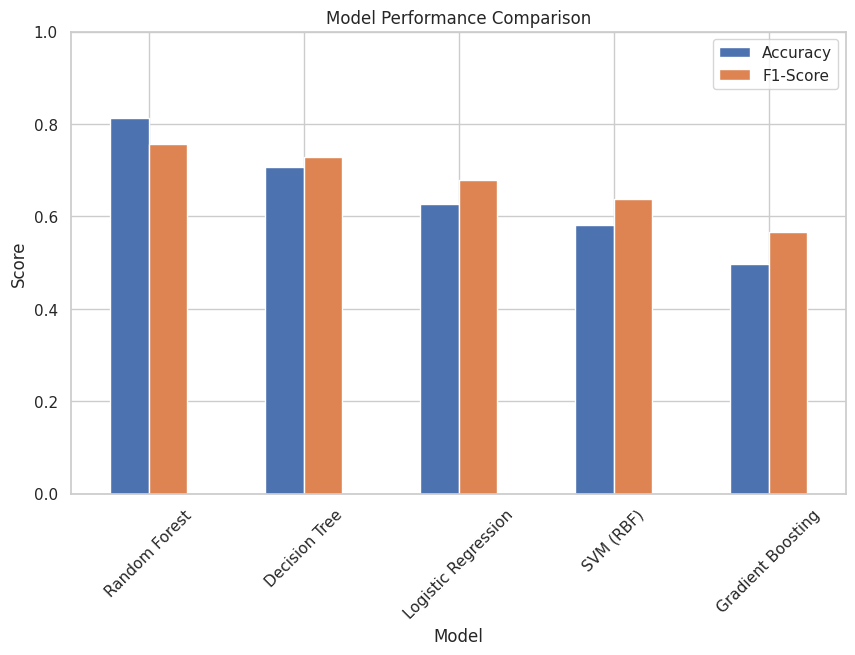

In [ ]:
import matplotlib.pyplot as plt

results_df.set_index("Model")[["Accuracy","F1-Score"]].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        multi_class="ovr"
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        class_weight="balanced",
        random_state=42
    ),
    "SVM (RBF)": SVC(
        kernel="rbf",
        probability=True,
        class_weight="balanced",
        random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        class_weight="balanced",
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    )
}


In [ ]:
best_model_name = results_df.iloc[0]["Model"]
final_model = models["Random Forest"]


In [ ]:
final_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

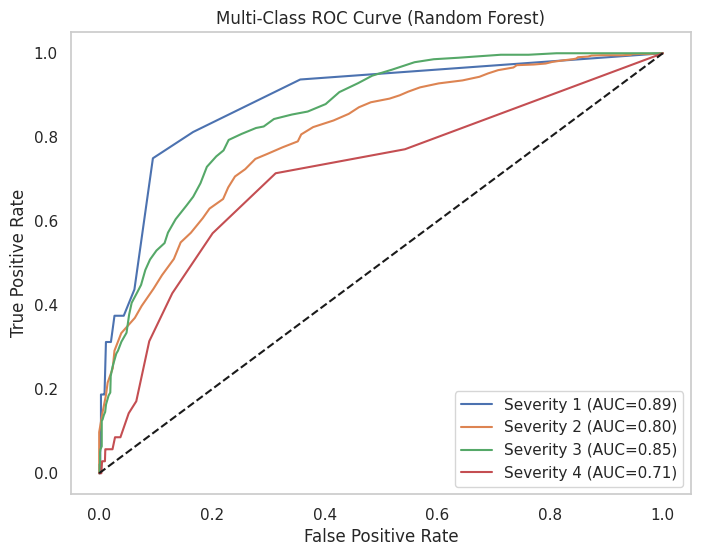

In [ ]:
y_score = final_model.predict_proba(X_test)

classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Severity {cls} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Multi-Class ROC Curve ({best_model_name})")
plt.legend()
plt.grid()
plt.show()


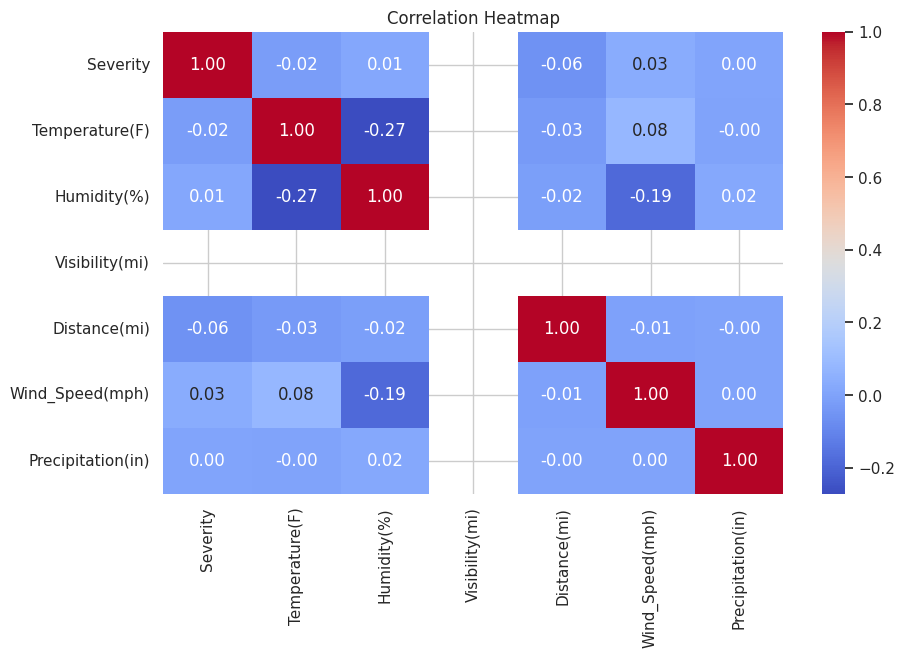

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric columns
num_cols = ['Severity','Temperature(F)','Humidity(%)','Visibility(mi)','Distance(mi)','Wind_Speed(mph)','Precipitation(in)']

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


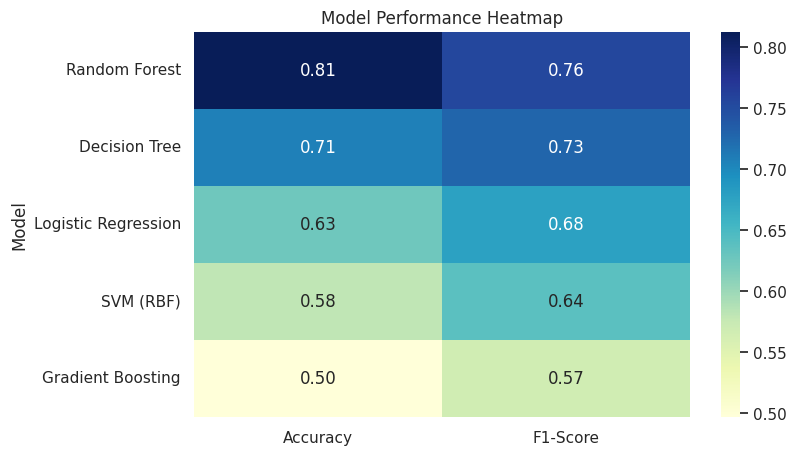

In [ ]:
import pandas as pd
import seaborn as sns

# Example: Model vs Metric
metrics_df = results_df.set_index("Model")[["Accuracy","F1-Score"]]
plt.figure(figsize=(8,5))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Model Performance Heatmap")
plt.show()

In [ ]:
rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_tuned_result = {
    "Model": "Random Forest (Tuned)",
    "Accuracy": accuracy_score(y_test, y_pred_rf_tuned),
    "Precision": precision_score(y_test, y_pred_rf_tuned, average='weighted'),
    "Recall": recall_score(y_test, y_pred_rf_tuned, average='weighted'),
    "F1-Score": f1_score(y_test, y_pred_rf_tuned, average='weighted')
}

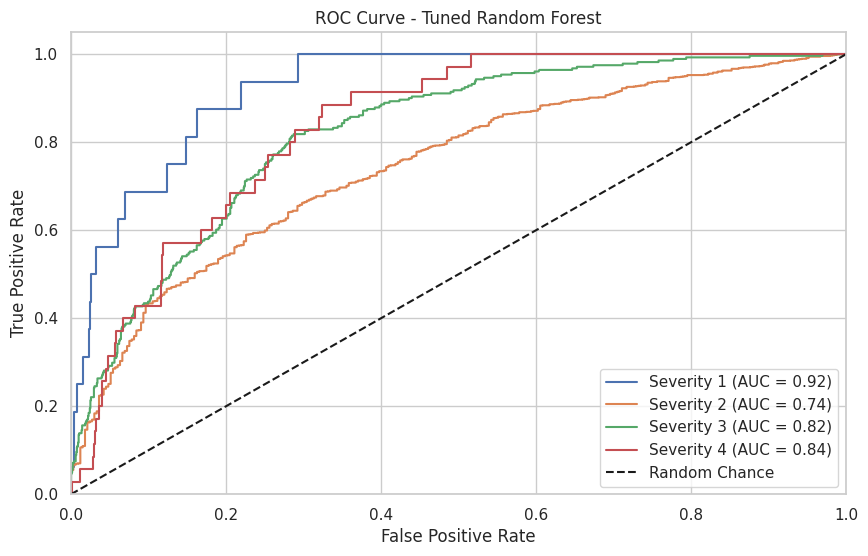

<Figure size 1000x600 with 0 Axes>

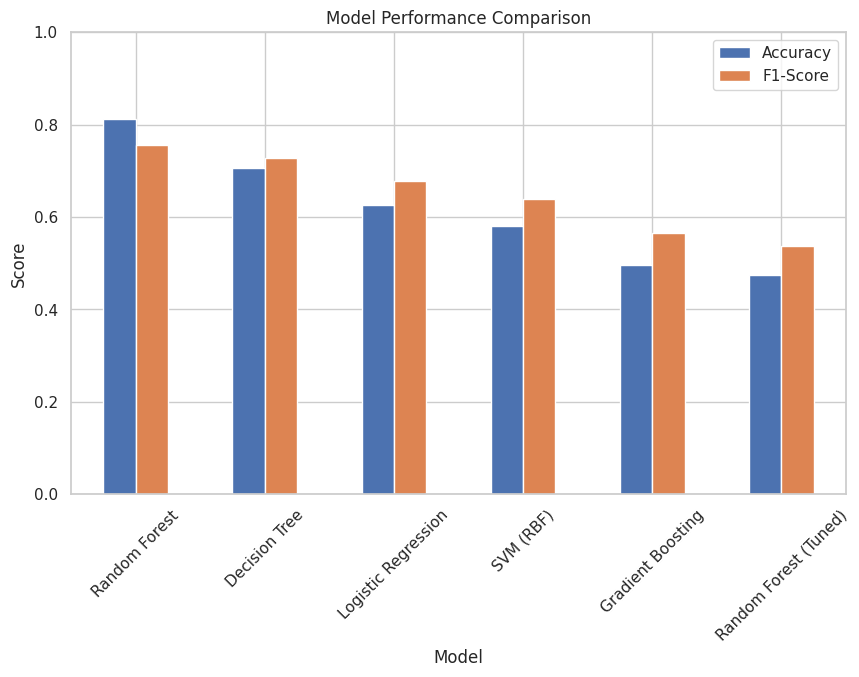

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Classes
classes = sorted(y_train.unique())
n_classes = len(classes)

# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=classes)

# Get predicted probabilities for Tuned RF
y_score_rf_tuned = rf_tuned.predict_proba(X_test)

# Plot ROC for each class
plt.figure(figsize=(10,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf_tuned[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Severity {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()


# Metrics comparison plot for all models
metrics_df = results_df.set_index("Model")[["Accuracy","F1-Score"]]

plt.figure(figsize=(10,6))
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Load only required columns for GIS map
use_cols_map = ['Start_Lat', 'Start_Lng', 'Severity']

df_map = pd.read_csv('/content/drive/MyDrive/ML Project/US_Accidents_March23.csv', usecols=use_cols_map)

# Optional: Sample for performance
sample_map = df_map.sample(5000, random_state=42)



In [ ]:
import folium

acc_map = folium.Map(location=[39.50, -98.35], zoom_start=4)  # USA center

for idx, row in sample_map.iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=2,
        color='red' if row['Severity'] >= 3 else 'blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(acc_map)

acc_map
